<a href="https://colab.research.google.com/github/gabriellfelipe7/Titanic_MLforDisaster/blob/main/Titanic_ML_for_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Titanic - ML for Disaster**
- Gabriel Felipe Machado de Oliveira
- Abril de 2023

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##**Importação e visualização dos dados**

In [2]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

In [3]:
display(data_train)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
#Informações das estruturas de nossas variáveis
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Resumo estatístico
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Limpeza e Tratamento dos dados**

In [6]:
#Retirando as colunas desnecessárias
data_train = data_train.drop(columns = ['PassengerId','Name','Ticket','Cabin'])
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
#Excluindo variáveis não numéricas
data_train = data_train.dropna()
data_train.shape

(712, 8)

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  712 non-null    int64  
 1   Pclass    712 non-null    int64  
 2   Sex       712 non-null    object 
 3   Age       712 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Fare      712 non-null    float64
 7   Embarked  712 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 50.1+ KB


In [9]:
#Pssíveis valores das variáveis categóricas passíveis de codificação
print('Valore da coluna Embarked:', data_train['Embarked'].unique())
print('Valores da coluna Sex:',data_train['Sex'].unique())

Valore da coluna Embarked: ['S' 'C' 'Q']
Valores da coluna Sex: ['male' 'female']


### **Codificando as variáveis categóricas**

In [10]:
#One Hot Encoding
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 3.4 MB/s eta 0:00:00


In [11]:
import category_encoders as ce
from category_encoders import OneHotEncoder

In [12]:
#Parametrizando a função e codificando as variávies
one_hot_enc = OneHotEncoder(cols = ['Sex', 'Embarked'])
one_hot_enc.fit_transform(data_train)

,Survived,Pclass,Sex_1,Sex_2,Age,SibSp,Parch,Fare,Embarked_1,Embarked_2,Embarked_3
0,0,3,1,0,22.0,1,0,7.2500,1,0,0
1,1,1,0,1,38.0,1,0,71.2833,0,1,0
2,1,3,0,1,26.0,0,0,7.9250,1,0,0
3,1,1,0,1,35.0,1,0,53.1000,1,0,0
4,0,3,1,0,35.0,0,0,8.0500,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0,1,39.0,0,5,29.1250,0,0,1
886,0,2,1,0,27.0,0,0,13.0000,1,0,0
887,1,1,0,1,19.0,0,0,30.0000,1,0,0
889,1,1,1,0,26.0,0,0,30.0000,0,1,0


In [13]:
data_train = one_hot_enc.fit_transform(data_train)

In [14]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Sex_1       712 non-null    int64  
 3   Sex_2       712 non-null    int64  
 4   Age         712 non-null    float64
 5   SibSp       712 non-null    int64  
 6   Parch       712 non-null    int64  
 7   Fare        712 non-null    float64
 8   Embarked_1  712 non-null    int64  
 9   Embarked_2  712 non-null    int64  
 10  Embarked_3  712 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 66.8 KB


### **Normalização**

In [19]:
x_data = data_train[list(data_train.columns[1:])]
y_data = data_train['Survived']

In [23]:
x_train = np.array(x_data)
y_train = np.array(y_data)

In [27]:
x_train, y_train[:9]

(array([[3., 1., 0., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 1., 0.],
        [3., 0., 1., ..., 1., 0., 0.],
        ...,
        [1., 0., 1., ..., 1., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        [3., 1., 0., ..., 0., 0., 1.]]),
 array([0, 1, 1, 1, 0, 0, 0, 1, 1]))

In [21]:
norm = StandardScaler()

In [28]:
X_train = norm.fit_transform(x_train)
X_train

array([[ 0.90859974,  0.75613751, -0.75613751, ...,  0.53403984,
        -0.47261792, -0.20232566],
       [-1.48298257, -1.32251077,  1.32251077, ..., -1.87251946,
         2.11587407, -0.20232566],
       [ 0.90859974, -1.32251077,  1.32251077, ...,  0.53403984,
        -0.47261792, -0.20232566],
       ...,
       [-1.48298257, -1.32251077,  1.32251077, ...,  0.53403984,
        -0.47261792, -0.20232566],
       [-1.48298257,  0.75613751, -0.75613751, ..., -1.87251946,
         2.11587407, -0.20232566],
       [ 0.90859974,  0.75613751, -0.75613751, ..., -1.87251946,
        -0.47261792,  4.94252683]])

## **Treinamento do Regressor**

In [71]:
#Iniciando o modelo de Regressão Logística
model1 = LogisticRegression()

In [72]:
#treinando o modelo com os dados de treino
model1.fit(X_train, y_train)

LogisticRegression()

## **Tratamento do conjunto de teste para a predição**

In [46]:
data_test = pd.read_csv('test.csv')
display(data_test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [47]:
#aplicando os mesmo tratamentos que o conjunto de treinamento
#tirando as colunas desnecessárias
data_test = data_test.drop(columns = ['Name','Ticket','Cabin'])

In [49]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [52]:
#substituindo valores Nan pelas médias das idades
data_test = data_test.fillna(np.mean(data_test['Age']))
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [57]:
#codificando variáveis categóricas
one_hot_enc = OneHotEncoder(cols = ['Sex', 'Embarked'])
one_hot_enc.fit_transform(data_test)
data_test = one_hot_enc.fit_transform(data_test)

data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex_1        418 non-null    int64  
 3   Sex_2        418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked_1   418 non-null    int64  
 9   Embarked_2   418 non-null    int64  
 10  Embarked_3   418 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 36.0 KB


In [60]:
#normalização
x_test = data_test[list(data_test.columns[1:])]
x_test = np.array(x_test)

X_test = norm.fit_transform(x_test)
X_test

array([[ 0.87348191,  0.75592895, -0.75592895, ...,  2.84375747,
        -1.35067551, -0.56814154],
       [ 0.87348191, -1.32287566,  1.32287566, ..., -0.35164743,
         0.74037028, -0.56814154],
       [-0.31581919,  0.75592895, -0.75592895, ...,  2.84375747,
        -1.35067551, -0.56814154],
       ...,
       [ 0.87348191,  0.75592895, -0.75592895, ..., -0.35164743,
         0.74037028, -0.56814154],
       [ 0.87348191,  0.75592895, -0.75592895, ..., -0.35164743,
         0.74037028, -0.56814154],
       [ 0.87348191,  0.75592895, -0.75592895, ..., -0.35164743,
        -1.35067551,  1.76012477]])

## **Predição**

In [73]:
#predição dos dados de teste
pred = model1.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [82]:
dic = {
    'PassengerId':list(data_test['PassengerId']),
    'Survived':list(pred)
    }

doc_kaggle = pd.DataFrame(dic)

doc_kaggle = doc_kaggle.set_index('PassengerId')

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [83]:
from google.colab import files

doc_kaggle.to_csv('predictions.csv')
files.download('predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

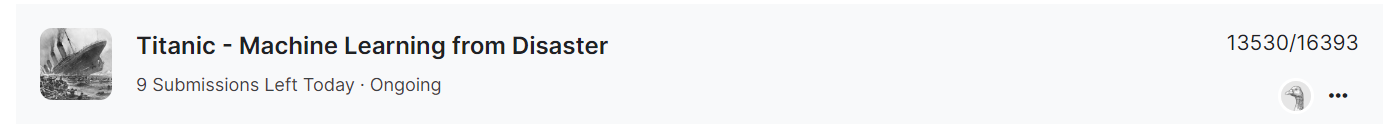

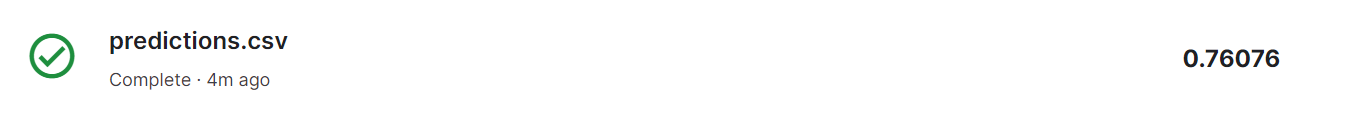